## Introducción
En este ejercicio vas a crear tu propio juego de **Hundir la flota** en Python. Para el desarrollo del programa neceistarás conocimientos de la librería `numpy`, módulos, bucles, funciones, clases y colecciones de Python. **Por lo que la entrega deberá constar de  varios scripts de Python (archivos .py), los que necesite el alumno**.

## ¿Cómo funciona el juego?
Vamos a realizar una versión que tiene algunas particularidades respecto al juego original, de manera que sea más sencillo el desarrollo. Veamos cómo funciona:

1. Hay dos jugadores: tú y la máquina
2. Un **tablero de 10 x 10** posiciones donde irán los barcos
3. Lo primero que se hace es colocar los barcos. Para este juego **los barcos se colocan de manera aleatoria. Ahora bien, puedes empezar colocando los barcos en unas posiciones fijas, que no cambien con cada partida, y después implementarlo aleatoriamente, ya que es más complejo. Los barcos son:**
    * 4 barcos de 1 posición de eslora
    * 3 barcos de 2 posiciones de eslora
    * 2 barcos de 3 posiciones de eslora
    * 1 barco de 4 posiciones de eslora

4. Tanto tú, como la máquina tenéis un tablero con barcos, y se trata de ir "disparando" y hundiendo los del adversario hasta que un jugador se queda sin barcos, y por tanto, pierde.
5. Funciona por turnos y empiezas tú.
6. En cada turno disparas a una coordenada (X, Y) del tablero adversario. **Si aciertas, te vuelve a tocar**. En caso contrario, le toca a la máquina.
7. En los turnos de la máquina, si acerta también le vuelve a tocar. ¿Dónde dispara la maquina? A un punto aleatorio en tu tablero.
8. Si se hunden todos los barcos de un jugador, el juego acaba y gana el otro.
9. Por norma del juego no puede haber barcos pegados el uno con el otro sin espacios entre ellos.

En [esta página](http://es.battleship-game.org/) podrás probarlo online.

## Desarrollo
Tendrás que desarrollar lo siguiente:
1. Necesitarás un conjunto de **constantes**, donde tengas inventariados los barcos del juego, dimensiones y demás variables que no vayan a cambiar que tendréis definidas en archivo de **variables.py**

2. Tendrás que construir **una clase Tablero**. Para facilitar el desarrollo, la mejor opción es desarrollar una clase tablero donde implementes las siguientes funcionalidades:
    * Cuando se inicialice deberás asignar
        * Un id de jugador, para saber de quién es el tablero.
        * Unas dimensiones de tablero, que en el fondo serán tus constantes 10 x 10.
        * Unos barcos. Los que hayas definido como constantes. Aqui simplemente puedes pasar, por ejemplo, un diccionario donde especifiques el nombre de tus barcos, y la eslora de cada uno. Luego ya los colocarás en el tablero.
        * **Un tablero sin barcos, que será un array de `numpy`** donde posicionarás los barcos. Este tablero está vacío, por lo que lo puedes rellenar de 0s, 1s, o el caracter que consideres.
        * Adicionalmente la clase tablero necesitará otro array de `numpy`, ¿por qué? porque el tablero de la maquina tendrá internamente un array con sus barcos (lo que no vemos) y hará falta otro array (que sí veremos nosotros) con los disparos efectuados, para saber dónde tenemos que disparar.
    * **Inicializar el tablero**, es decir, colocar los barcos. O bien lo haces en el constructor, o en un método de la clase. Si los colocas aleatoriamente, mucho cuidado aquí de poner los barcos dentro del tablero, y de no colocar unos barcos encima de otros :)
    * Necesitarás un método de **buscar coordenada**. Cuando hay un disparo de un jugador en ese tablero, tendrás que comprobar si ahi había un barco, o simplemente agua. Acuérdate de marcar en el tablero, tanto si hay un impacto, como si dio agua.
    * NO te ciñas a los métodos que te acabo de mencionar, crea todos los que necesites, introduce en el constructor lo que quieras y desarrolla las funciones que consideres oportunas para facilitarte el desarrollo.

3. Una vez ya tienes modelizado tu tablero, hay que montar el programa que se ejecutara desde un **main.py**:
    * El programa no es más que el **típico `while true: `, con una serie de inputs del usuario**. Se está ejecutando constantemente y le pide al usuario coordenadas para comprobar si impacta.
    * Cuando arranque el programa, primero pon algún mensaje de bienvenida y las instrucciones del juego.
    * A continuación **inicializa los tableros de ambos jugadores** con los barcos. Estas dos primeras acciones solo se ejecutan una vez!! Que es el comienzo del juego.
    * Después de eso ya comienza el juego. Básicamente **se irá ejecutando iterativamente en el `while`, y le irá preguntando coordenadas al usuario.**
    * Recoges coordenadas, compruebas en el tablero de la máquina si habia barco.
        * Hay barco: marca en el tablero de la maquina el impacto y le vuelve a tocar al usuario
        * No hay barco: le toca a la maquina. O lo que es lo mismo, escoge una coordenada aleatoria, y comprueba en el tablero del usuario si habia barco.
    * **Así hasta que uno de los dos jugadores se quede sin barcos, y termina el juego.**
    * Cuando empiece tu turno deberías imprimir por pantalla tu tablero, para ver cuántos impactos te ha hecho la máquina, así como el tablero con los impactos que has hecho tu en el adversario, de manera que te sirva de ayuda para el siguiente disparo.
    * Todas aquellas funciones que puedas construir para la ejecución de este programa deberán estar definidas en un script que se llame **funciones.py**.

Hay infinidad de maneras para resolver este ejercicio, por lo que siéntete libre de implementarlo de la forma que te resulte más cómoda.

In [1]:
# Creamos un nuevo entorno y se viene lo chido
# !pip install notebook
# !pip install numpy
# !pip install matplotlib
# !pip install playsound -- al final no
# !pip install pygame
# !pip install pyttsx3


import numpy as np
import string
import time
# from playsound import playsound
import pygame # Sonido
import pyttsx3 # Texto a sonido
from IPython.display import Image, display # Imagen

pygame 2.6.1 (SDL 2.28.4, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
pygame.mixer.init()
abecedario = list(map(chr, range(ord('A'), ord('Z') + 1)))

def reproducir_sonido(ruta):
    pygame.mixer.music.load(ruta)              # 1. Carga el archivo de sonido (mp3, wav, etc.)
    pygame.mixer.music.play()                  # 2. Reproduce el sonido
    while pygame.mixer.music.get_busy():       # 3. Espera hasta que el sonido termine
        pygame.time.Clock().tick(10)

def texto_a_sonido(texto):
    # Inicializar el motor
    engine = pyttsx3.init()

    # Establecer la velocidad de la voz (opcional)
    engine.setProperty('rate', 150)  # Valores comunes son 100-200

    # Establecer el volumen (opcional)
    engine.setProperty('volume', 1)  # 0.0 a 1.0

    # Convertir texto a voz
    engine.say(texto)

    # Reproducir el texto en voz alta
    engine.runAndWait()
    

In [3]:
class Jugador:

    def __init__(self, nombre_jugador, is_jugador, dimensiones_tablero=[10, 10], eslora_barcos=[5], is_modo_manual = False): 
        # Restricciones del juego: los barcos no pueden tener más de 5 de eslora
        # Aún no se pueden introducir los barcos de forma manual
        # Falta interfaz gráfica
        # Falta sonido

        #Portaaviones, acorazado, destructor, lancha
        self.nombre_jugador = nombre_jugador
        self.dimensiones_tablero = dimensiones_tablero
        self.eslora_barcos = eslora_barcos
        self.is_modo_manual = is_modo_manual
        self.is_jugador = is_jugador

        # Contar barcos
        self.n_portaaviones = self.eslora_barcos.count(5)
        self.n_acorazados = self.eslora_barcos.count(4)
        self.n_destructores = self.eslora_barcos.count(3)
        self.n_lanchas = self.eslora_barcos.count(2)
        self.n_barcos = len(self.eslora_barcos)

        # Crear tablero vacio
        self.tablero = self.crear_tablero_vacio()
        self.tablero_fantasma = self.crear_tablero_vacio()
        self.tablero_disparos = self.crear_tablero_vacio()
        
        if self.is_modo_manual == False:
            self.crear_posiciones_barcos_aleatorio()
        
        if self.is_jugador == False:
            self.dificultad = self.preguntar_modo_dificultad()
            self.presentacion_personaje()

        self.disparos_recibidos = []
        self.disparos_lanzados = []
        self.coordenadas_ultimo_tocado = []

    def preguntar_modo_dificultad(self):
        valido = False
        while valido != True:
            modo_dificultad = input('Introduzca modo de dificultad: 0 = Facil, 1 = Dificil')
            if modo_dificultad == '0' or modo_dificultad == '1':
                valido = True

        match modo_dificultad:
            case '0':
                modo_dificultad = 'facil'
            case '1':
                modo_dificultad = 'dificil' 
        return modo_dificultad
    
    def presentacion_personaje(self):

        if self.dificultad == 'facil':
            display(Image('Imagenes/holandes.png'))
            reproducir_sonido('Sonido/ghost-sound.mp3')
            texto = '''Veo que eres un cobarde que elige el modo fácil'''
            print(texto)
            texto_a_sonido(texto)
        elif self.dificultad == 'dificil':
            display(Image('Imagenes/Luffy.jpg', width=300))
            reproducir_sonido('Sonido/pirate-battle.mp3')
            texto = '''Veo que eres valiente, admiro tu valor. Pero prepárate para perder,
            porque voy a convertirme en el rey de los piratas'''
            print(texto)
            texto_a_sonido(texto)

    
    def crear_tablero_vacio(self):
        return np.full((self.dimensiones_tablero[0], self.dimensiones_tablero[1]), ' ')

    def generar_coordenadas_barco(self, orientacion, eslora): # Posicion puede ser vertical o horizontal
        # Start position
        start_x = np.random.randint(0, self.tablero.shape[0])
        start_y = np.random.randint(0, self.tablero.shape[1])
        coordenadas = -1*np.ones((eslora,2), dtype=int)

        # Continue
        match orientacion:

            case 'N':
                for i in range(0, eslora):
                    coordenadas[i, 0] = start_x + i
                    coordenadas[i, 1] = start_y 
            case 'S':
                for i in range(0, eslora):
                    coordenadas[i, 0] = start_x - i
                    coordenadas[i, 1] = start_y
            case 'E':
                for j in range(0, eslora):
                    coordenadas[j, 0] = start_x
                    coordenadas[j, 1] = start_y + j
            case 'O':
                for j in range(0, eslora):
                    coordenadas[j, 0] = start_x
                    coordenadas[j, 1] = start_y - j
        return coordenadas
    
    # Comprobar todas las condiciones de que las coordenadas sean validas
    def is_coordenadas_in_limite_tablero (self, coordenadas): # coordenadas deber ser una lista de tuplas. Cada tupla es un par (x,y)
        dentro = True
        for coordenada in coordenadas:
            if coordenada[0] >= self.tablero.shape[0] or coordenada[0] < 0 or coordenada[1] >= self.tablero.shape[1] or coordenada[1] < 0:
                dentro = False
                return dentro
            
        return dentro 
    
    def is_coordenadas_libre(self, coordenadas):
        # coordenadas deber ser una lista de tuplas. Cada tupla es un par (x,y)

        libre = True

        for coordenada in coordenadas:
            if self.tablero_fantasma[coordenada[0], coordenada[1]] != ' ': # Tiene en cuenta si hay un barco en la casilla o colindante
                libre = False
                return libre

        return libre
    

    
    def is_coordenadas_valida(self, coordenadas):

        valida = True

        valida = self.is_coordenadas_in_limite_tablero(coordenadas)
        if valida == False:
            return valida
        
        valida = self.is_coordenadas_libre(coordenadas)
        if valida == False:
            return valida
        
        return valida
    
    # Una vez sabemos que la coordenada es válida, colocar el barco
    def colocar_barco(self, coordenadas):
        for coordenada in coordenadas:
            self.tablero[coordenada[0], coordenada[1]] = 'O'
            self.tablero_fantasma[coordenada[0], coordenada[1]] = 'O'

    def crear_posiciones_barcos_aleatorio(self):
        coordenadas_todos_los_barcos = []
        for i in range(len(self.eslora_barcos)):
            valida = False
            while valida == False:
                orientacion = np.random.choice(['N', 'S', 'E', 'O'])
                coordenadas = self.generar_coordenadas_barco(orientacion, self.eslora_barcos[i])
                valida = self.is_coordenadas_valida(coordenadas)

            # Si llegamos aquí la coordenada es valida
            self.colocar_barco(coordenadas)
            self.colocar_marcadores_fantasma(coordenadas)
            coordenadas_todos_los_barcos.append(coordenadas.copy().tolist())

        # Una vez están todos los barcos, añadirlos al diccionario
        coordenadas_todos_los_barcos.reverse()
        self.add_barcos_to_diccionario(coordenadas_todos_los_barcos)

    def add_barcos_to_diccionario(self, coordenadas):

        my_dict = {}

        for i in range(self.n_portaaviones):
            nombre = 'portavion_' + str(i)
            my_dict.update({nombre: {'vida': 5, 'coordenadas': []}})
        for i in range(self.n_acorazados):
            nombre = 'acorazado_' + str(i)
            my_dict.update({nombre: {'vida': 4, 'coordenadas': []}})
        for i in range(self.n_destructores):
            nombre = 'destructor_' + str(i)
            my_dict.update({nombre: {'vida': 3, 'coordenadas': []}})
        for i in range(self.n_lanchas):
            nombre = 'lancha_' + str(i)
            my_dict.update({nombre: {'vida': 2, 'coordenadas': []}})

        contador = 0
        for key, value in my_dict.items():
            my_dict[key]['coordenadas'] = coordenadas[contador]
            contador += 1

        self.info_barcos = my_dict


    def imprimir_tablero(self, tablero):
        letras = np.array(list(string.ascii_uppercase))
        print(' ', letras[:np.shape(tablero)[1]])
        for i, fila in enumerate(tablero):
            print(i, fila)

    def colocar_marcadores_fantasma(self, coordenadas):

        # Determinar orientacion
        if coordenadas[0, 0] == coordenadas[1, 0]:
            orientacion = 'horizontal'
        else:
            orientacion = 'vertical'

        # Caso vertical: orientacion norte o sur
        if orientacion == 'vertical':
            # Limites fila
            min_fila = np.min(coordenadas[:,0])
            max_fila =  np.max(coordenadas[:,0])

            # Limites columna
            columna = coordenadas[0, 1]

            max_fila_tablero = np.shape(self.tablero_fantasma)[0] - 1
            max_col_tablero = np.shape(self.tablero_fantasma)[1] - 1

            # Colocar marcador arriba y abajo
            if min_fila != 0: # Gestionar caso límite superior
                self.tablero_fantasma[min_fila - 1, columna] = '*' # Arriba
                if columna != 0:
                    self.tablero_fantasma[min_fila - 1, columna - 1] = '*' # Arriba izquierda
                if columna < max_col_tablero:
                    self.tablero_fantasma[min_fila - 1, columna + 1] = '*' # Arriba derecha

            if max_fila < max_fila_tablero : # Gestionar caso límite inferior
                self.tablero_fantasma[max_fila + 1, columna] = '*' # Abajo
                if columna != 0:
                    self.tablero_fantasma[max_fila + 1, columna - 1] = '*' # Abajo izquierda
                if columna < max_col_tablero:   
                    self.tablero_fantasma[max_fila + 1, columna + 1] = '*' # Abajo derecha
            

            # Pintar a la izquierda del barco
            if columna != 0:
                self.tablero_fantasma[min_fila : max_fila + 1, columna - 1] = '*'

            # Pintar a la derecha del barco
            if columna < max_col_tablero:
                self.tablero_fantasma[min_fila : max_fila + 1, columna + 1]= '*'


        # Caso horizontal: orientacion este u oeste
        else:
            # Limites fila
            fila = coordenadas[0,0]

            # Limites columna
            min_col = np.min(coordenadas[:,1])
            max_col = np.max(coordenadas[:,1])

            max_fila_tablero = np.shape(self.tablero_fantasma)[0] - 1
            max_col_tablero = np.shape(self.tablero_fantasma)[1] - 1

            # Colocar marcador izquierda y derecha
            if min_col != 0: # Gestionar caso límite izquierdo
                self.tablero_fantasma[fila, min_col - 1] = '*' # Izquierda
                if fila != 0:
                    self.tablero_fantasma[fila - 1, min_col - 1] = '*' # Arriba izquierda
                if fila < max_fila_tablero:
                    self.tablero_fantasma[fila + 1, min_col - 1] = '*' # Abajo izquierda

            if max_col < max_col_tablero : # Gestionar caso límite izquierdo
                self.tablero_fantasma[fila, max_col + 1] = '*' # Derecha
                if fila != 0:
                    self.tablero_fantasma[fila - 1, max_col + 1] = '*' # Arriba derecha
                if fila < max_fila_tablero:   
                    self.tablero_fantasma[fila + 1, max_col + 1 ] = '*' # Abajo derecha
            

            # Pintar arriba del barco
            if fila != 0:
                self.tablero_fantasma[fila - 1, min_col : max_col + 1] = '*'

            # Pintar debajo del barco
            if fila < max_fila_tablero:
                 self.tablero_fantasma[fila + 1, min_col : max_col + 1]= '*'
    
    # Falta añadir la opcion de poner los barcos manualmente, así como una lista de posiciones predeterminadas, la lista se puede consultar en un link

    # Ya esta definido el tablero de juego, ahora toca gestionar los disparos

    # Empezamos gestionando la recepcion de disparos
    def recibir_disparo(self, coordenada):
        tocado = False
        hundido = False
        derrota = False
        self.disparos_recibidos.append(coordenada)
        if self.tablero[coordenada[0], coordenada[1]] == ' ': # Caso toca agua
            self.tablero[coordenada[0], coordenada[1]] = '-'
            print('Agua')
        else:                                                   # Caso toca barco
            self.tablero[coordenada[0], coordenada[1]] = 'X'
            tocado = True
            for barco in self.info_barcos:
                if coordenada in self.info_barcos[barco]['coordenadas']:
                    self.info_barcos[barco]['vida'] -= 1
                    print(f'Restante vida barco: {self.info_barcos[barco]["vida"]}')
                    if self.info_barcos[barco]['vida'] > 0:
                        print(f'Barco tocado')
                    else:
                        hundido = True
                        print(f'Barco {barco} tocado y hundido')
                        self.n_barcos -= 1
                        if self.n_barcos == 0:
                            derrota = True
                            
        return tocado, hundido, derrota
    
    def elegir_coordenadas_disparo_random(self):
        coordenada_x = np.random.randint(0, np.shape(self.tablero)[0])
        coordenada_y = np.random.randint(0, np.shape(self.tablero)[1])

        return [coordenada_x, coordenada_y]
    
    def elegir_coordenadas_disparo_inteligente(self):
        # Nota en esta seccion de codigo contamos con que si el disparo no es valido, volvemos a tirar, por lo que vamos a hacer cosas
        # que computacionalmente no son las más eficientes pero funcionan
        
        if len(self.coordenadas_ultimo_tocado) == 0: # Si no tenemos ni idea de dónde está el barco
            coordenadas = self.elegir_coordenadas_disparo_random()
        else: # Ultima coordenada es tocado, pero no hundido
            if len(self.coordenadas_ultimo_tocado) == 1: # Solo tenemos una coordenada
                coordenadas = self.disparo_alrededor_coordenada(self.coordenadas_ultimo_tocado) 
            elif len(self.coordenadas_ultimo_tocado) == 2: # Ya hemos dado dos impactos, determinar direccion
                if self.coordenadas_ultimo_tocado[0][0] == self.coordenadas_ultimo_tocado[1][0]:
                    self.direccion_barco_disparado = 'horizontal'
                else:
                    self.direccion_barco_disparado = 'vertical'

                print(f'El barco está en posición: {self.direccion_barco_disparado}')
                
                if self.direccion_barco_disparado == 'horizontal':
                    minimo = np.min(np.array(self.coordenadas_ultimo_tocado)[:,1])
                    maximo = np.max(np.array(self.coordenadas_ultimo_tocado)[:,1])

                    nuevo_disparo_col = np.random.choice([minimo -1, maximo + 1])

                    coordenadas = [self.coordenadas_ultimo_tocado[0][0], nuevo_disparo_col]
                else:
                    minimo = np.min(np.array(self.coordenadas_ultimo_tocado)[:,0])
                    maximo = np.max(np.array(self.coordenadas_ultimo_tocado)[:,0])

                    nuevo_disparo_fila = np.random.choice([minimo -1, maximo + 1])

                    coordenadas = [nuevo_disparo_fila, self.coordenadas_ultimo_tocado[0][1]]
            else: # Es decir, ya hemos dado al menos 2 disparos en el barco
                if self.direccion_barco_disparado == 'horizontal':
                    minimo = np.min(np.array(self.coordenadas_ultimo_tocado)[:,1])
                    maximo = np.max(np.array(self.coordenadas_ultimo_tocado)[:,1])

                    nuevo_disparo_col = np.random.choice([minimo -1, maximo + 1])

                    coordenadas = [self.coordenadas_ultimo_tocado[0][0], nuevo_disparo_col]
                else:
                    minimo = np.min(np.array(self.coordenadas_ultimo_tocado)[:,0])
                    maximo = np.max(np.array(self.coordenadas_ultimo_tocado)[:,0])

                    nuevo_disparo_fila = np.random.choice([minimo -1, maximo + 1])
                    coordenadas = [nuevo_disparo_fila, self.coordenadas_ultimo_tocado[0][1]]

        return coordenadas
    
    def disparo_alrededor_coordenada(self, coordenada):
        # Primero elegimos si queremos probar arriba, abajo, izquierda o derecha
        direccion = np.random.choice(['arriba', 'abajo', 'izquierda', 'derecha'])
        print(f'Direccion: {direccion}, coordenada: {abecedario[coordenada[0][1]]}, {coordenada[0][0]}')
        match direccion:
            case 'arriba':
                coordenada = [coordenada[0][0] - 1, coordenada[0][1]]
            case 'abajo':
                coordenada = [coordenada[0][0] + 1, coordenada[0][1]]
            case 'izquierda':
                coordenada = [coordenada[0][0], coordenada[0][1] - 1]
            case 'derecha':
                coordenada = [coordenada[0][0], coordenada[0][1] + 1]
        
        return coordenada
    
    def colocar_marcadores_fantasma_barco_hundido(self, coordenadas, tablero): # coordenadas va ser self.coordenadas_ultimo_tocado

        # Vamos a partir de la funcion self.colocar_marcadores_fantasma() y modificar el codigo
        coordenadas_colindantes = []

        # Determinar orientacion
        if coordenadas[0, 0] == coordenadas[1, 0]:
            orientacion = 'horizontal'
        else:
            orientacion = 'vertical'

        # Caso vertical: orientacion norte o sur
        if orientacion == 'vertical':
            # Limites fila
            min_fila = np.min(coordenadas[:,0])
            max_fila =  np.max(coordenadas[:,0])

            # Limites columna
            columna = coordenadas[0, 1]

            max_fila_tablero = np.shape(tablero)[0] - 1
            max_col_tablero = np.shape(tablero)[1] - 1

            # Colocar marcador arriba y abajo
            if min_fila != 0: # Gestionar caso límite superior
                tablero[min_fila - 1, columna] = '*' # Arriba
                coordenadas_colindantes.append([min_fila-1, columna])
                if columna != 0:
                    tablero[min_fila - 1, columna - 1] = '*' # Arriba izquierda
                    coordenadas_colindantes.append([min_fila-1, columna-1])
                if columna < max_col_tablero:
                    tablero[min_fila - 1, columna + 1] = '*' # Arriba derecha
                    coordenadas_colindantes.append([min_fila-1, columna+1])

            if max_fila < max_fila_tablero : # Gestionar caso límite inferior
                tablero[max_fila + 1, columna] = '*' # Abajo
                coordenadas_colindantes.append([max_fila+1, columna])
                if columna != 0:
                    tablero[max_fila + 1, columna - 1] = '*' # Abajo izquierda
                    coordenadas_colindantes.append([max_fila+1, columna-1])
                if columna < max_col_tablero:   
                    tablero[max_fila + 1, columna + 1] = '*' # Abajo derecha
                    coordenadas_colindantes.append([max_fila+1, columna+1])
            

            # Pintar a la izquierda del barco
            if columna != 0:
                tablero[min_fila : max_fila + 1, columna - 1] = '*'
                for numero in range(min_fila, max_fila+1):
                    coordenadas_colindantes.append([numero, columna-1])
                    

            # Pintar a la derecha del barco
            if columna < max_col_tablero:
                tablero[min_fila : max_fila + 1, columna + 1]= '*'
                
                for numero in range(min_fila, max_fila+1):
                    coordenadas_colindantes.append([numero, columna+1])


        # Caso horizontal: orientacion este u oeste
        else:
            # Limites fila
            fila = coordenadas[0,0]

            # Limites columna
            min_col = np.min(coordenadas[:,1])
            max_col = np.max(coordenadas[:,1])

            max_fila_tablero = np.shape(tablero)[0] - 1
            max_col_tablero = np.shape(tablero)[1] - 1

            # Colocar marcador izquierda y derecha
            if min_col != 0: # Gestionar caso límite izquierdo
                tablero[fila, min_col - 1] = '*' # Izquierda
                coordenadas_colindantes.append([fila, min_col-1])
                if fila != 0:
                    tablero[fila - 1, min_col - 1] = '*' # Arriba izquierda
                    coordenadas_colindantes.append([fila-1, min_col-1])
                if fila < max_fila_tablero:
                    tablero[fila + 1, min_col - 1] = '*' # Abajo izquierda
                    coordenadas_colindantes.append([fila+1, min_col-1])

            if max_col < max_col_tablero : # Gestionar caso límite izquierdo
                tablero[fila, max_col + 1] = '*' # Derecha
                coordenadas_colindantes.append([fila, max_col+1])
                if fila != 0:
                    tablero[fila - 1, max_col + 1] = '*' # Arriba derecha
                    coordenadas_colindantes.append([fila-1, max_col+1])
                if fila < max_fila_tablero:   
                    tablero[fila + 1, max_col + 1 ] = '*' # Abajo derecha
                    coordenadas_colindantes.append([fila+1, max_col+1])
            

            # Pintar arriba del barco
            if fila != 0:
                tablero [fila - 1, min_col : max_col + 1] = '*'
                for numero in range(min_col, max_col+1):
                    coordenadas_colindantes.append([fila-1, numero])

            # Pintar debajo del barco
            if fila < max_fila_tablero:
                 tablero[fila + 1, min_col : max_col + 1]= '*'
                 for numero in range(min_col, max_col+1):
                    coordenadas_colindantes.append([fila+1, numero])

        return coordenadas_colindantes, tablero

In [4]:
class Partida:

    def bienvenida(self):
        texto = '''
        ¡Bienvenido a Hundir la Flota!
        Tu misión es hundir los barcos del oponente antes de que él hunda los tuyos. ¡Acierta las casillas y hunde sus barcos!
        ¡Buena suerte, que gane el mejor!'''

        display(Image('Imagenes/u-s-navy.jpg', width=500))
        print(texto)
        texto_a_sonido(texto)
        reproducir_sonido('Sonido/nuke.mp3')

    def inicio_partida(self):
        dimensiones_validas = False

        while dimensiones_validas != True:
            try:
                n_filas = int(input('Dime el numero de filas (número aconsejado: 10): '))
                n_columnas = int(input('Dime el numero de columnas (número aconsejado: 10): '))
                dimensiones_validas = True
            except ValueError:
                continue

        self.dimensiones_tablero = [n_filas, n_columnas]
        # Crear primer jugador
        nombre_jugador_1 = input('Dime el nombre del jugador 1: ')
        is_jugador = True
        jugador1 = Jugador(nombre_jugador=nombre_jugador_1, is_jugador=is_jugador, dimensiones_tablero=[n_filas, n_columnas])

        # Crear segundo jugador
        nombre_jugador_2 = 'Maquina' # Esto puede que cambie en el futuro
        is_jugador = False
        jugador2 = Jugador(nombre_jugador=nombre_jugador_2, is_jugador=is_jugador, dimensiones_tablero=[n_filas, n_columnas])

        self.jugadores = [jugador1, jugador2]

        # Pedir otros atributos como el número de barcos si se considera necesario

    def decidir_primer_turno(self):
        # Tiramos una moneda al aire:
        self.indice_jugador = np.random.randint(0,2)

    def cambio_jugador(self):
        if self.indice_jugador == 0:
            self.indice_jugador = 1
        else:
            self.indice_jugador = 0

    def pedir_coordenadas_disparo(self):
        coordenadas_validas = False

        while coordenadas_validas != True:
            try: # Debemos comprobar que esté dentro de los limites del tablero y que no se haya lanzado ya, asi como que sea un numero entero
                coordenada_y = ord(input('Letra de disparo: ').upper()) - ord('A') 
                coordenada_x = int(input('Número de disparo: '))
                coordenadas_disparo = [coordenada_x, coordenada_y]
                if coordenada_x < self.dimensiones_tablero[0] and coordenada_y < self.dimensiones_tablero[1] and coordenada_y >= 0: # Dentro del limite del tablero
                    if coordenadas_disparo not in self.jugadores[self.indice_jugador].disparos_lanzados:   # No se ha realizado ya ese disparo
                        coordenadas_validas = True
        
            except ValueError:
                print('Coordenadas no válidas')
        
        self.jugadores[self.indice_jugador].disparos_lanzados.append(coordenadas_disparo)
        return coordenadas_disparo
    
    def coordenadas_disparo_aleatorias(self):
        coordenadas_validas = False
        while coordenadas_validas != True:
            # Debemos comprobar que esté dentro de los limites del tablero y que no se haya lanzado ya, asi como que sea un numero entero
            coordenada_x = np.random.randint(0, self.dimensiones_tablero[0])
            coordenada_y = np.random.randint(0, self.dimensiones_tablero[1])
            coordenadas_disparo = [coordenada_x, coordenada_y]
            if coordenada_x < self.dimensiones_tablero[0] and coordenada_y < self.dimensiones_tablero[1]: # Dentro del limite del tablero
                if coordenadas_disparo not in self.jugadores[self.indice_jugador].disparos_lanzados:   # No se ha realizado ya ese disparo
                    coordenadas_validas = True
        
        self.jugadores[self.indice_jugador].disparos_lanzados.append(coordenadas_disparo)
        return coordenadas_disparo

    def coordenadas_disparo_inteligente(self):
        coordenadas_validas = False
        while coordenadas_validas != True:
            coordenadas = self.jugadores[self.indice_jugador].elegir_coordenadas_disparo_inteligente()
            is_coordenadas_in_tablero = True
            if coordenadas[0] < 0 or coordenadas[0] >= self.dimensiones_tablero[0] or coordenadas[1] < 0 or coordenadas[1] >= self.dimensiones_tablero[1]:
                is_coordenadas_in_tablero = False
            is_coordenadas_nueva = coordenadas not in self.jugadores[self.indice_jugador].disparos_lanzados
            if is_coordenadas_nueva == True and is_coordenadas_in_tablero == True:
                coordenadas_validas = True

            self.jugadores[self.indice_jugador].disparos_lanzados.append(coordenadas)
        return coordenadas

    def ronda_juego(self, keep_mystery=False):
        
        print(f'Es el turno de {self.jugadores[self.indice_jugador].nombre_jugador}')
        if self.jugadores[self.indice_jugador].is_jugador == True:
            coordenadas = self.pedir_coordenadas_disparo()
        else: # Es el turno de la maquina
            if self.jugadores[self.indice_jugador].dificultad == 'facil':
                coordenadas = self.coordenadas_disparo_aleatorias()
            elif self.jugadores[self.indice_jugador].dificultad == 'dificil':
                coordenadas = self.coordenadas_disparo_inteligente()


        time.sleep(1)
        print(f'Coordenadas: {abecedario[coordenadas[1]], coordenadas[0]}')
        self.cambio_jugador()
        tocado, hundido, derrota = self.jugadores[self.indice_jugador].recibir_disparo(coordenadas)
        
        self.cambio_jugador()
        
        if tocado == True:
            repetir_turno = True
            self.jugadores[self.indice_jugador].tablero_disparos[coordenadas[0], coordenadas[1]] = 'X'
            reproducir_sonido('Sonido/nuke.mp3')
            display(Image('Imagenes/arrow.jpg', width=300))
            if self.jugadores[self.indice_jugador].is_jugador == False : # Si es la maquina
                self.jugadores[self.indice_jugador].coordenadas_ultimo_tocado.append(coordenadas)
                
                if hundido == True:
                    display(Image('Imagenes/explosion.jpg', width=300))
                    reproducir_sonido('Sonido/rock.mp3')
                    # La siguiente linea coloca marcadores alrededor de las posiciones del barco hundido y mete las posiciones como ya disparadas
                    coordenadas_alrededor_barco, self.jugadores[self.indice_jugador].tablero_disparos = self.jugadores[self.indice_jugador].colocar_marcadores_fantasma_barco_hundido(np.array(self.jugadores[self.indice_jugador].coordenadas_ultimo_tocado), self.jugadores[self.indice_jugador].tablero_disparos)
                    self.jugadores[self.indice_jugador].disparos_lanzados.append(coordenadas_alrededor_barco)
                    self.jugadores[self.indice_jugador].coordenadas_ultimo_tocado = []
                    self.jugadores[self.indice_jugador].direccion_barco_disparado = ' '
                    self.jugadores[self.indice_jugador].imprimir_tablero(self.jugadores[self.indice_jugador].tablero_disparos)
                
        else:
            repetir_turno = False
            self.jugadores[self.indice_jugador].tablero_disparos[coordenadas[0], coordenadas[1]] = '-'
            reproducir_sonido('Sonido/water.mp3')

        if self.jugadores[self.indice_jugador].is_jugador==True:
            print('Tu tablero: ')
            self.jugadores[self.indice_jugador].imprimir_tablero(self.jugadores[self.indice_jugador].tablero)
        elif keep_mystery == False and self.jugadores[self.indice_jugador].is_jugador==False:
            print('Tu tablero: ')
            self.jugadores[self.indice_jugador].imprimir_tablero(self.jugadores[self.indice_jugador].tablero)
        print('Tablero de disparos: ')
        self.jugadores[self.indice_jugador].imprimir_tablero(self.jugadores[self.indice_jugador].tablero_disparos)

        return repetir_turno, derrota

In [5]:
def felicitar_campeon(partida):
    print(f'Enhorabuena, {partida.jugadores[partida.indice_jugador].nombre_jugador}, has ganado')

    if partida.jugadores[partida.indice_jugador].nombre_jugador == 'Maquina':
        
        if partida.jugadores[1].dificultad == 'facil':
            display(Image('Imagenes/holandes_sonrisa.jpg', width=500))
        else:
            display(Image('Imagenes/luffy_victoria.png', width=500))
            
        reproducir_sonido('Sonido/defeat.mp3')
    else:
        if partida.jugadores[1].dificultad == 'facil':
            display(Image('Imagenes/holandes_triste.jpg', width=500))
        else:
            display(Image('Imagenes/luffy_triste.jpg', width=500))

        reproducir_sonido('Sonido/victory.mp3')

def testeo(is_testeo, partida):
    if is_testeo == True:
        barco = 'portavion_0'
        print('Tablero jugador')
        print(partida.jugadores[0].tablero)
        print(partida.jugadores[0].info_barcos[barco]['coordenadas'])
        partida.jugadores[1].coordenadas_ultimo_tocado.append( partida.jugadores[0].info_barcos[barco]['coordenadas'][0])
        partida.jugadores[1].tablero_disparos[partida.jugadores[0].info_barcos[barco]['coordenadas'][0][0], partida.jugadores[0].info_barcos[barco]['coordenadas'][0][1]] = 'X'
        print(partida.jugadores[1].tablero_disparos)
        partida.jugadores[1].disparos_lanzados.append(partida.jugadores[0].info_barcos[barco]['coordenadas'][0])
        partida.jugadores[0].tablero[partida.jugadores[0].info_barcos[barco]['coordenadas'][0][0], partida.jugadores[0].info_barcos[barco]['coordenadas'][0][1]] = 'X'
        partida.jugadores[0].disparos_recibidos.append(partida.jugadores[0].info_barcos[barco]['coordenadas'][0])
        partida.jugadores[0].info_barcos[barco]['vida'] -= 1

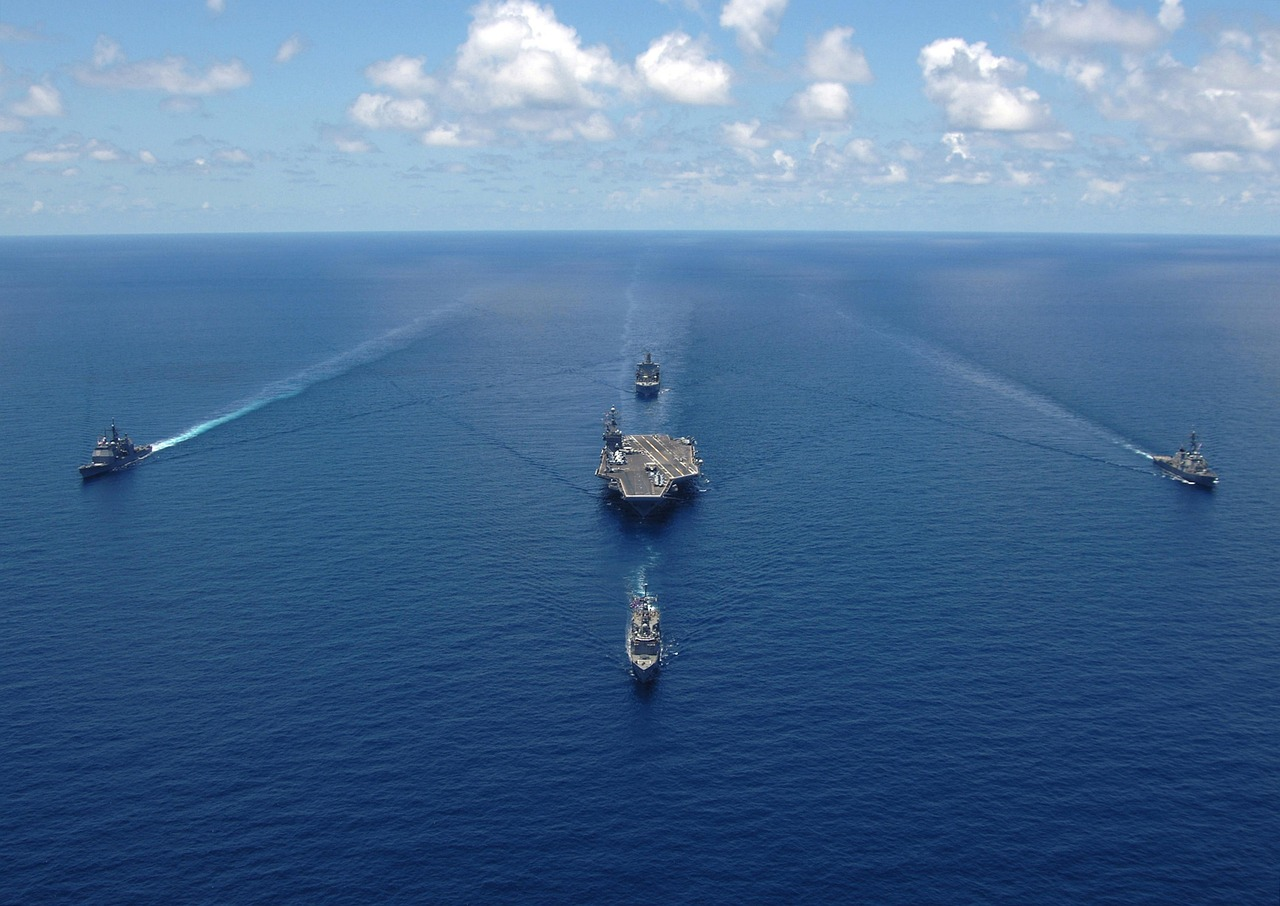


        ¡Bienvenido a Hundir la Flota!
        Tu misión es hundir los barcos del oponente antes de que él hunda los tuyos. ¡Acierta las casillas y hunde sus barcos!
        ¡Buena suerte, que gane el mejor!


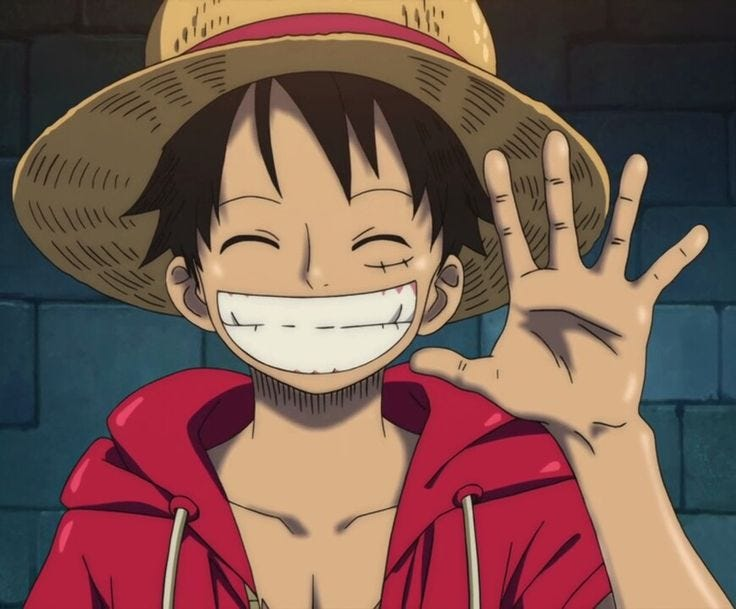

Veo que eres valiente, admiro tu valor. Pero prepárate para perder,
            porque voy a convertirme en el rey de los piratas
Tablero jugador
[[' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['O' 'O' 'O' 'O' 'O' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']]
[[5, 0], [5, 1], [5, 2], [5, 3], [5, 4]]
[[' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 

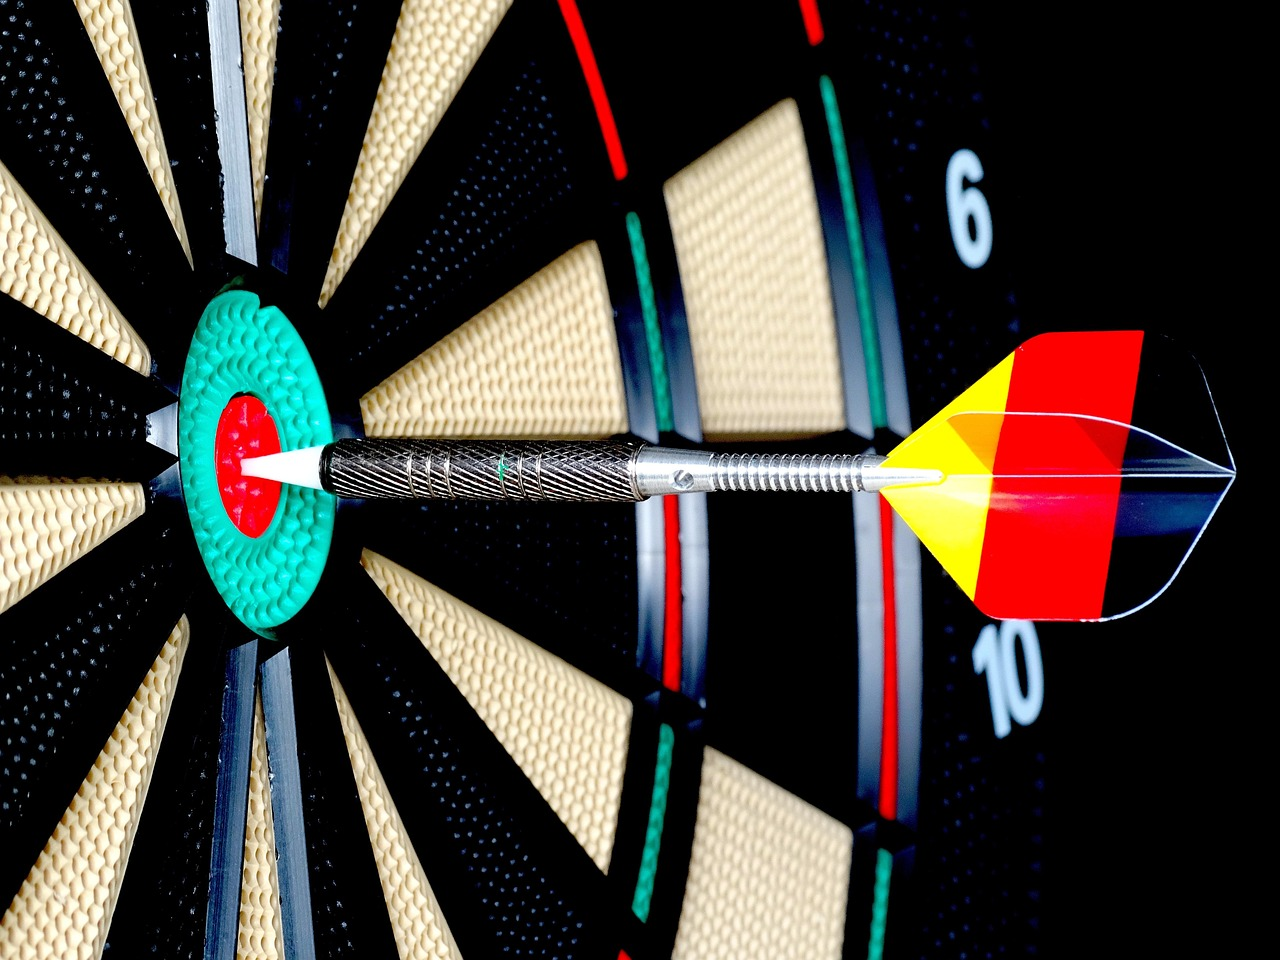

Tu tablero: 
  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
0 ['-' ' ' ' ' ' ' 'O' 'O' 'O' 'O' 'O' ' ']
1 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
2 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
3 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
4 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
5 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
6 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
7 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
8 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
9 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Tablero de disparos: 
  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
0 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
1 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
2 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
3 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
4 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
5 ['X' 'X' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
6 ['-' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
7 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
8 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
9 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 

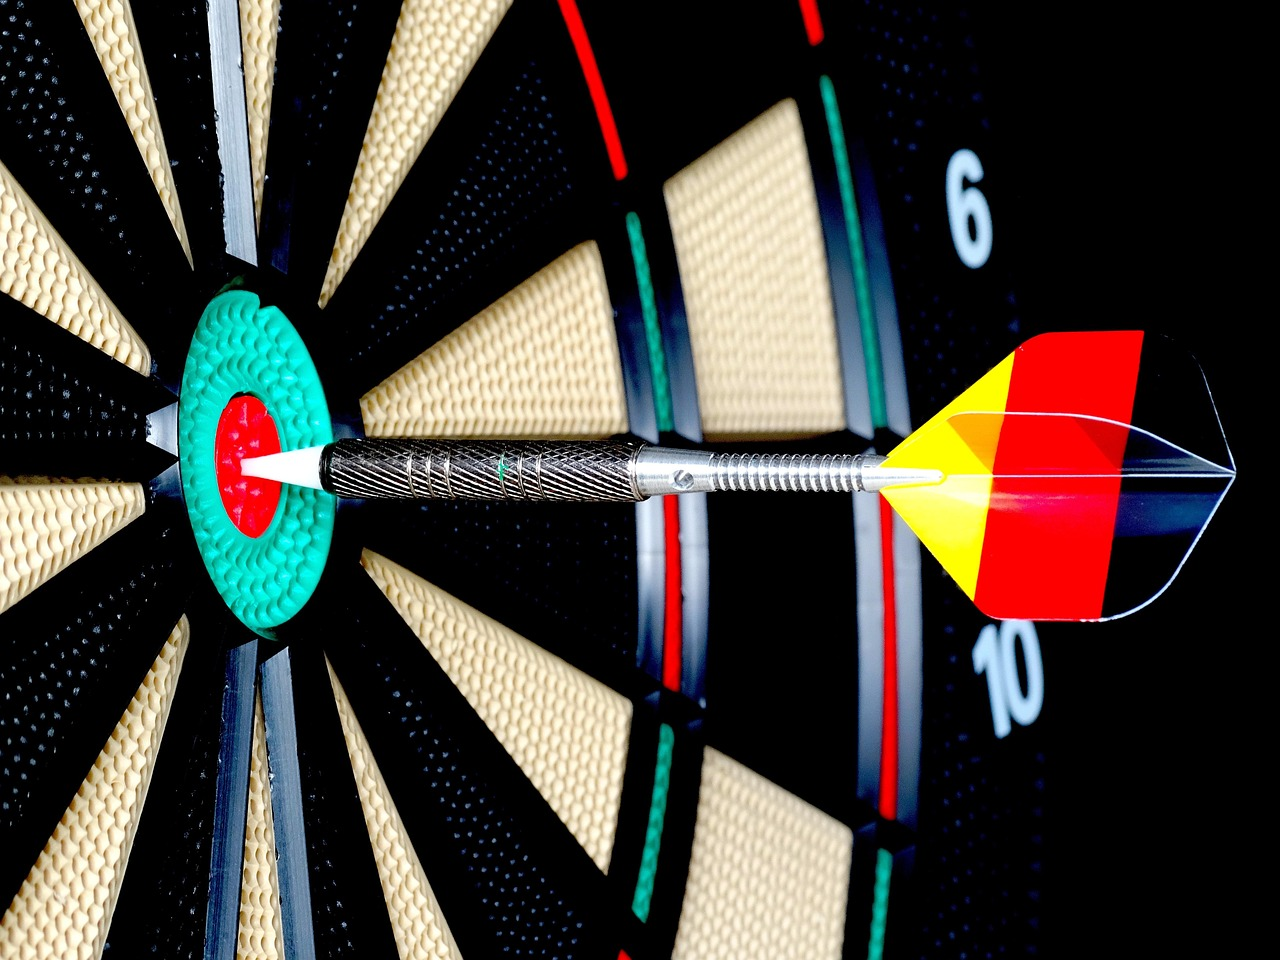

Tu tablero: 
  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
0 ['-' ' ' ' ' ' ' 'O' 'O' 'O' 'O' 'O' ' ']
1 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
2 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
3 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
4 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
5 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
6 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
7 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
8 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
9 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Tablero de disparos: 
  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
0 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
1 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
2 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
3 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
4 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
5 ['X' 'X' 'X' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
6 ['-' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
7 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
8 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
9 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 

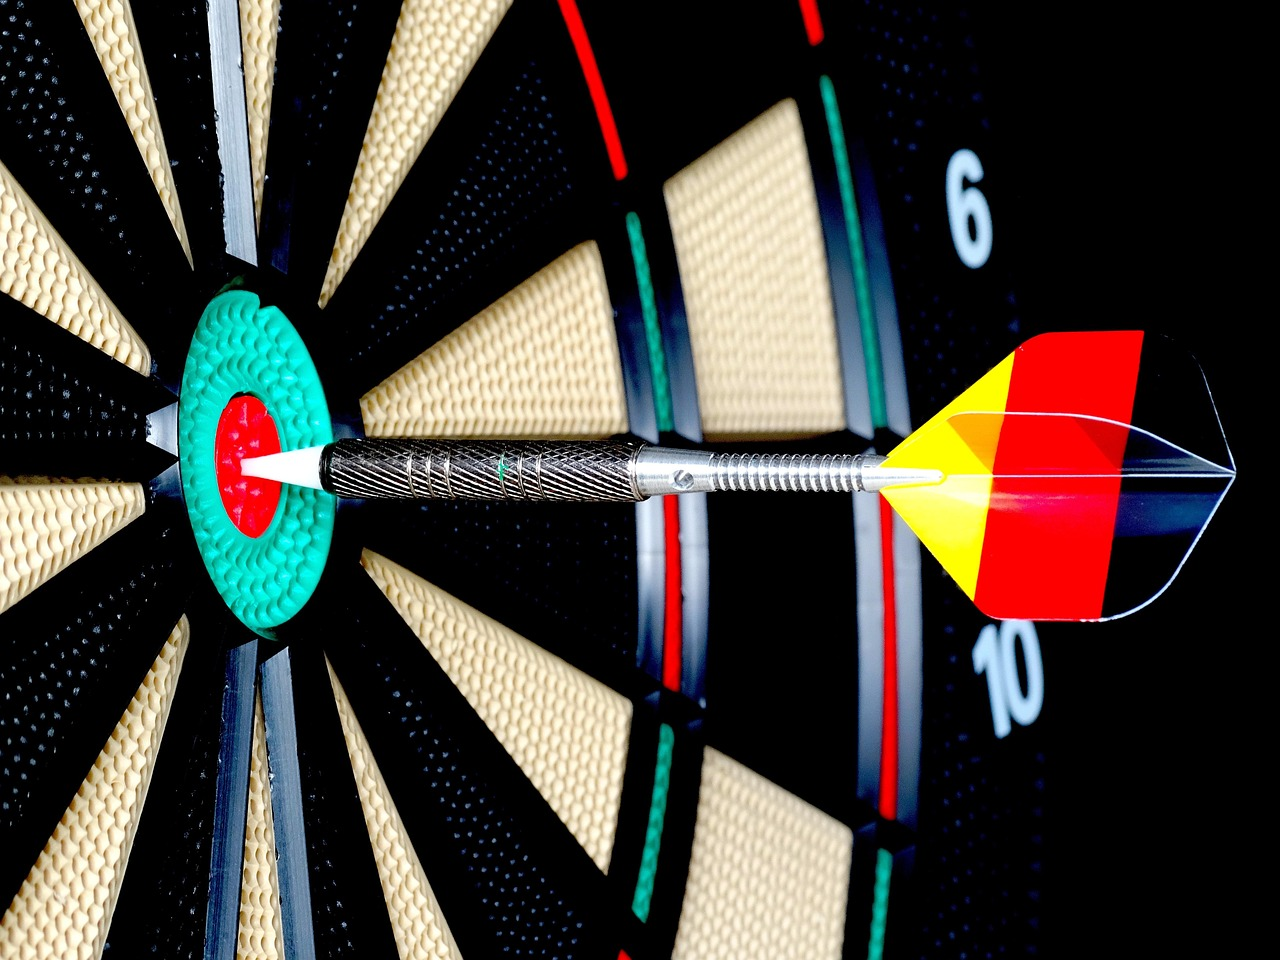

Tu tablero: 
  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
0 ['-' ' ' ' ' ' ' 'O' 'O' 'O' 'O' 'O' ' ']
1 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
2 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
3 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
4 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
5 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
6 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
7 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
8 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
9 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Tablero de disparos: 
  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
0 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
1 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
2 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
3 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
4 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
5 ['X' 'X' 'X' 'X' ' ' ' ' ' ' ' ' ' ' ' ']
6 ['-' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
7 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
8 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
9 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 

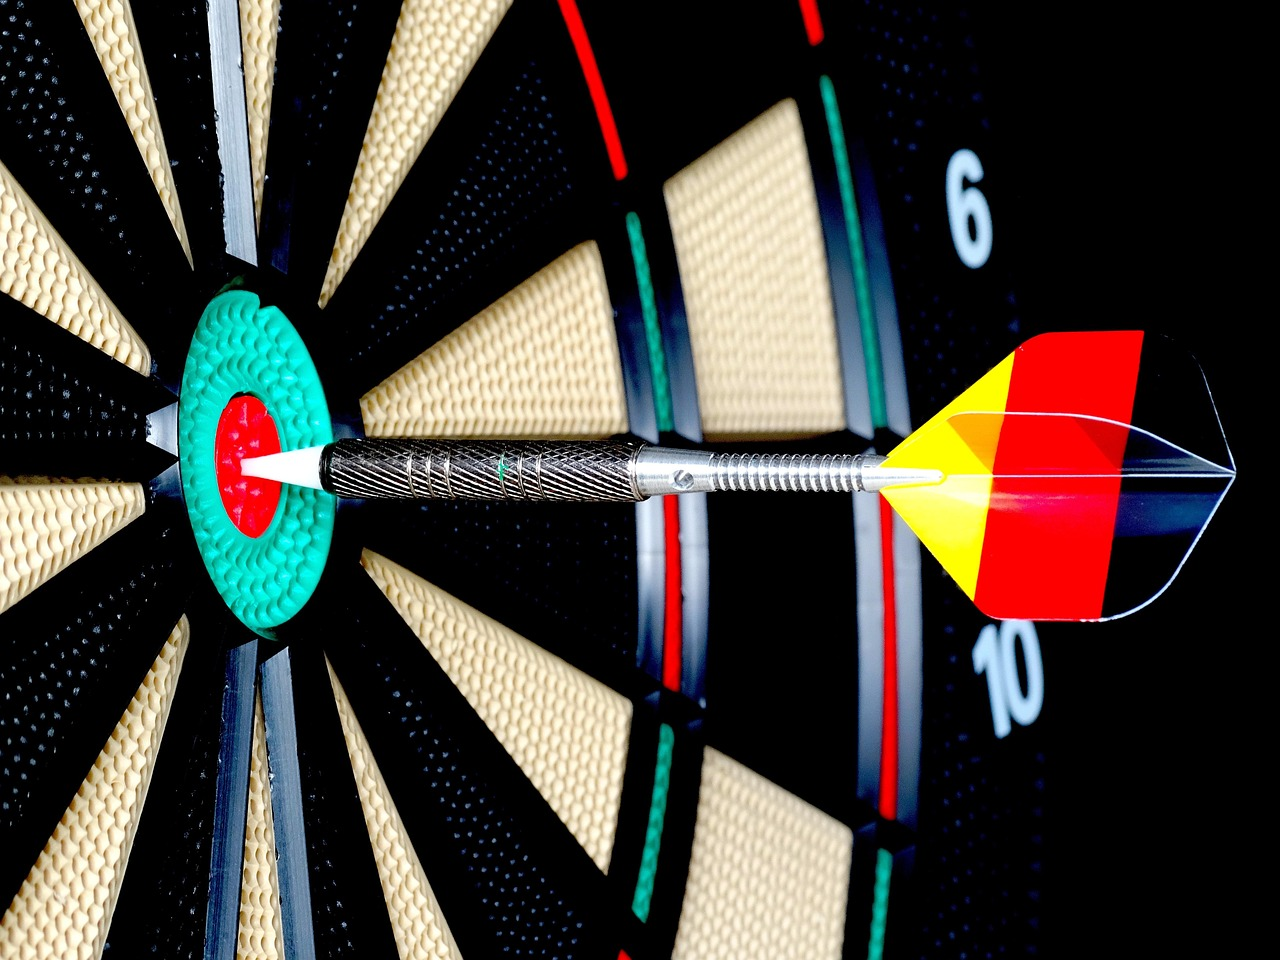

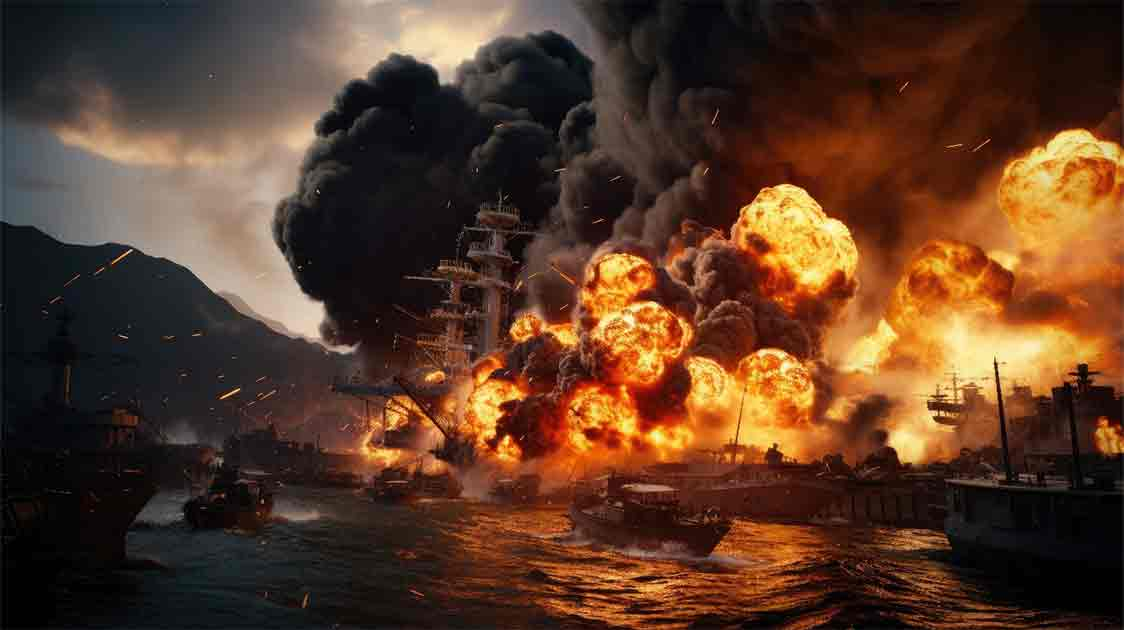

  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
0 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
1 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
2 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
3 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
4 ['*' '*' '*' '*' '*' '*' ' ' ' ' ' ' ' ']
5 ['X' 'X' 'X' 'X' 'X' '*' ' ' ' ' ' ' ' ']
6 ['*' '*' '*' '*' '*' '*' ' ' ' ' ' ' ' ']
7 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
8 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
9 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Tu tablero: 
  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
0 ['-' ' ' ' ' ' ' 'O' 'O' 'O' 'O' 'O' ' ']
1 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
2 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
3 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
4 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
5 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
6 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
7 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
8 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
9 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Tablero de disparos

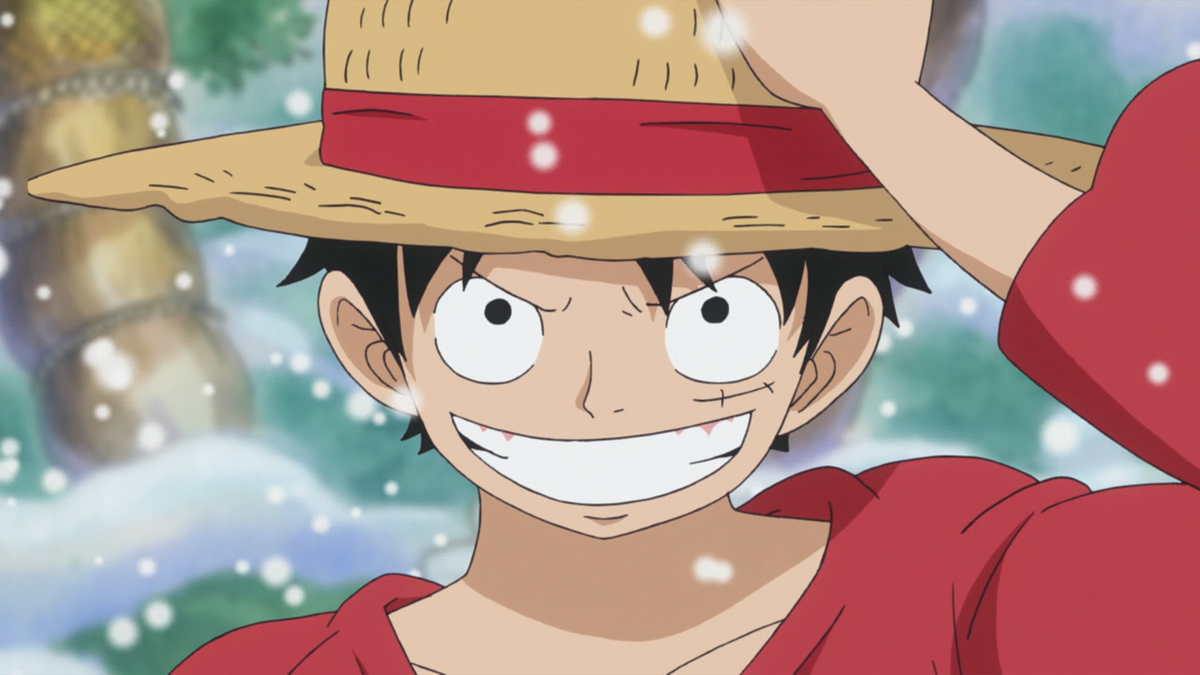

In [6]:
# Codigo principal

keep_mystery = False
is_testeo = True

# Empezamos la partida
derrota = False
partida = Partida()
partida.bienvenida()
partida.inicio_partida()

# Para comprobar que el modo inteligente funciona correctamente
testeo(is_testeo, partida)

partida.decidir_primer_turno()

while derrota == False:
    tocado, derrota = partida.ronda_juego(keep_mystery)

    if tocado == False:
        partida.cambio_jugador()

felicitar_campeon(partida)